**Unstructured Data Analytics: Group Assignment #2**

# Group Members:
1. Rithu Anand Krishnan
2. Manvi Mahajan
3. Paul Wen (Yilin Wen)
4. Alex Yu
5. Judy Chen (Yu-Ting Chen)

In [50]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import itertools, collections
import networkx as nx

from matplotlib import pyplot
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.util import bigrams
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

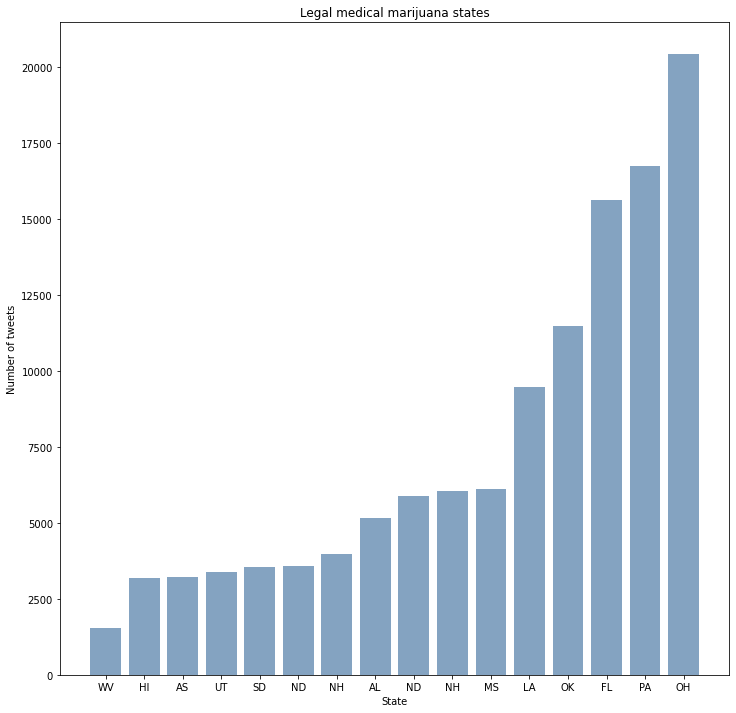

In [51]:
data = [5156,3208,5892,15635,3182,9485,6050,6119,3577,3989,20457,11490,16760,3537,3396,1554]
bars = ['AL','AS','DE','FL','HI','LA','MN','MS','ND','NH','OH','OK','PA','SD','UT','WV']

data.sort()
bars = ['WV','HI','AS','UT','SD','ND','NH','AL','ND','NH','MS','LA','OK','FL','PA','OH']
x_pos = np.arange(len(bars))
fig, ax = plt.subplots(figsize=(12, 12))

plt.bar(x_pos, data, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('State')
plt.ylabel('Number of tweets')
plt.title('Legal medical marijuana states')
plt.xticks(x_pos, bars)
plt.show()

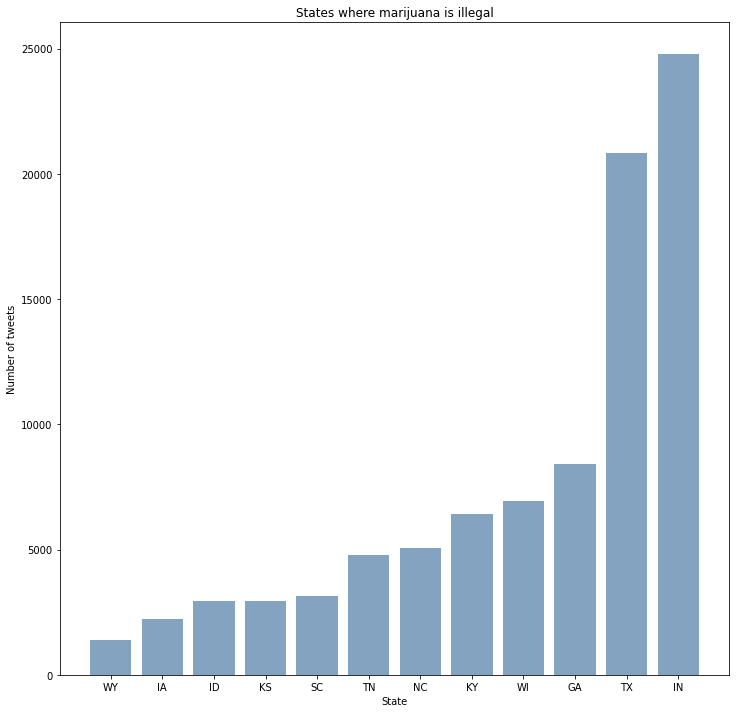

In [52]:
data = [8410,2934,24801,2236,2938,6413,5067,3136,4770,20845,6943,1381]
bars = ['GA','ID','IN','IA','KS','KY','NC','SC','TN','TX','WI','WY']

data.sort()
bars = ['WY','IA','ID','KS','SC','TN','NC','KY','WI','GA','TX','IN']
x_pos = np.arange(len(bars))
fig, ax = plt.subplots(figsize=(12, 12))

plt.bar(x_pos, data, color=(0.2, 0.4, 0.6, 0.6))
plt.xlabel('State')
plt.ylabel('Number of tweets')
plt.title('States where marijuana is illegal')
plt.xticks(x_pos, bars)
plt.show()

In [53]:
#Pick top 4 from M
#OH, PA, FL, OK
OH_df = pd.read_csv("OHLegalize.csv", on_bad_lines='skip', encoding='utf-8', index_col=0)
PA_df = pd.read_csv("PALegalize.csv", on_bad_lines='skip', lineterminator='\n', encoding='utf-8', index_col=0)
OK_df = pd.read_csv("OKLegalize.csv", on_bad_lines='skip', encoding='utf-8', index_col=0)
FL_df = pd.read_csv("FLLegalize.csv", on_bad_lines='skip', encoding='utf-8', index_col=0)

In [54]:
OH_df.head(5)

username                      location  \
0          13abc                  Toledo, Ohio   
1  Filtermag_org                  New York, NY   
2      8320Julie                           NaN   
3  OhioEricJones               Youngstown Ohio   
4  OhioGreenTeam  Throughout Ohio via Telemed!   

                                                text  
0  If Ohio lawmakers don't take action to legaliz...  
1  "Of course, advocates would like to see Ohio t...  
2  @franklarose claims #Ohio constitution needs t...  
3      Do you think it's time to legalize marijuana?  
4  “The greatest virtue of man is perhaps curiosi...

In [55]:
#Removing stopwords
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

OH_df['processed_text'] = OH_df['text'].apply(lambda x: cleaning_stopwords(x))

#Removing punctuations
punctuations_list = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
OH_df['processed_text']= OH_df['processed_text'].apply(lambda x: cleaning_punctuations(x))

#Tokenizing the tweets
OH_df['processed_text'] = OH_df['processed_text'].apply(word_tokenize)

#Applying Stemming
stemming = nltk.PorterStemmer()
def stemmer_on_text(data):
    text = [stemming.stem(word) for word in data]
    return data
OH_df['processed_text'] = OH_df['processed_text'].apply(lambda x: stemmer_on_text(x))

#Applying lemmatizer
lemmatizing = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lemmatizing.lemmatize(word) for word in data]
    return data
OH_df['processed_text'] = OH_df['processed_text'].apply(lambda x: lemmatizer_on_text(x))

OH_df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


username                      location  \
0          13abc                  Toledo, Ohio   
1  Filtermag_org                  New York, NY   
2      8320Julie                           NaN   
3  OhioEricJones               Youngstown Ohio   
4  OhioGreenTeam  Throughout Ohio via Telemed!   

                                                text  \
0  If Ohio lawmakers don't take action to legaliz...   
1  "Of course, advocates would like to see Ohio t...   
2  @franklarose claims #Ohio constitution needs t...   
3      Do you think it's time to legalize marijuana?   
4  “The greatest virtue of man is perhaps curiosi...   

                                      processed_text  
0  [If, Ohio, lawmakers, take, action, legalize, ...  
1  [Of, course, advocates, would, like, see, Ohio...  
2  [franklarose, claims, Ohio, constitution, need...  
3             [Do, think, time, legalize, marijuana]  
4  [“, The, greatest, virtue, man, perhaps, curio...

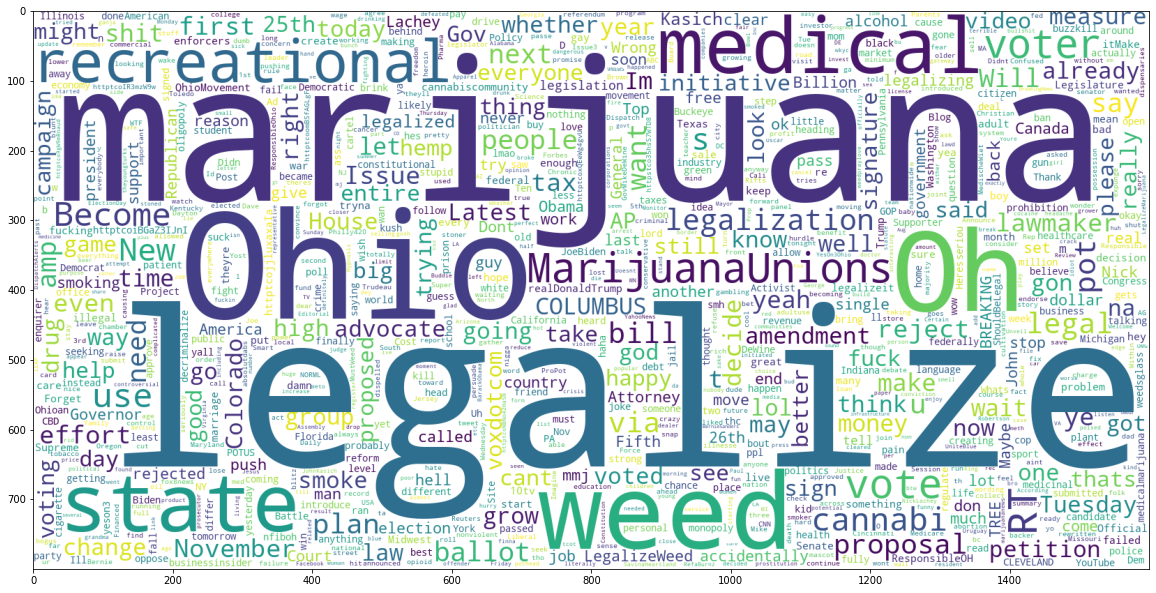

In [56]:
OH_df['processed_text_string'] = OH_df['processed_text'].apply(lambda x: ','.join(str(v) for v in x))
# WordCloud for all words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, background_color ='white',
               collocations=False).generate(" ".join(OH_df['processed_text_string']))
plt.imshow(wc)
     

In [57]:

PA_df['processed_text'] = PA_df['text'].apply(lambda x: cleaning_stopwords(x))

PA_df['processed_text']= PA_df['processed_text'].apply(lambda x: cleaning_punctuations(x))

#Tokenizing the tweets
PA_df['processed_text'] = PA_df['processed_text'].apply(word_tokenize)

PA_df['processed_text'] = PA_df['processed_text'].apply(lambda x: stemmer_on_text(x))

PA_df['processed_text'] = PA_df['processed_text'].apply(lambda x: lemmatizer_on_text(x))

PA_df.head()

username          location  \
0    AllahHewitt  Philadelphia, PA   
1    mattkrotzer               NaN   
2  THEbrandonJ87                PA   
3  StanKachowski    Pittsburgh, PA   
4      sidejobs6               USA   

                                                text  \
0  @JohnFetterman Hello John, when will you legal...   
1  I always wonder why @PASenateGOP @SenatorAumen...   
2  The medical marijuana industry is thriving in ...   
3  @KDKA For years PA watched tax revenue flow to...   
4  @JohnFetterman @PaHouseDems @Joanna4PA Nice no...   

                                      processed_text  
0  [JohnFetterman, Hello, John, legalize, marijua...  
1  [I, always, wonder, PASenateGOP, SenatorAument...  
2  [The, medical, marijuana, industry, thriving, ...  
3  [KDKA, For, years, PA, watched, tax, revenue, ...  
4  [JohnFetterman, PaHouseDems, Joanna4PA, Nice, ...

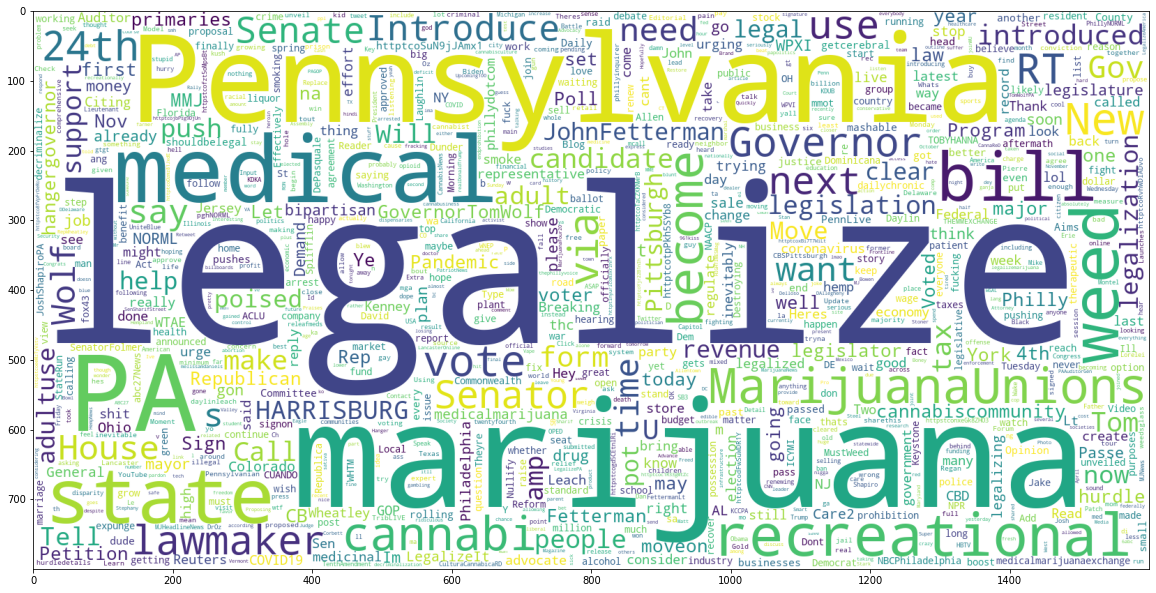

In [58]:
PA_df['processed_text_string'] = PA_df['processed_text'].apply(lambda x: ','.join(str(v) for v in x))
# WordCloud for all words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, background_color ='white',
               collocations=False).generate(" ".join(PA_df['processed_text_string']))
plt.imshow(wc)

In [59]:

FL_df['processed_text'] = FL_df['text'].apply(lambda x: cleaning_stopwords(x))

FL_df['processed_text']= FL_df['processed_text'].apply(lambda x: cleaning_punctuations(x))

#Tokenizing the tweets
FL_df['processed_text'] = FL_df['processed_text'].apply(word_tokenize)

FL_df['processed_text'] = FL_df['processed_text'].apply(lambda x: stemmer_on_text(x))

FL_df['processed_text'] = FL_df['processed_text'].apply(lambda x: lemmatizer_on_text(x))

FL_df.head()

username                        location  \
0      Josie2192                Far Far Away, FL   
1  Tenenbaum1017  South Florida via Jersey Shore   
2    MixDoniagee                 VintageOlisa🪐⚡️   
3       loobca69                             NaN   
4     LookAtRojo           804 aka #KrownCity VA   

                                                text  \
0            Fully legalize it in Florida #marijuana   
1  So what do you do when your sitting in the mal...   
2  Nearly 50,000 valid petition signatures have b...   
3  People of Florida: Legalize Recreational Marij...   
4  I know Florida got medical marijuana... Did th...   

                                      processed_text  
0              [Fully, legalize, Florida, marijuana]  
1  [So, sitting, mall, waiting, wife, get, done, ...  
2  [Nearly, 50000, valid, petition, signatures, s...  
3  [People, Florida, Legalize, Recreational, Mari...  
4  [I, know, Florida, got, medical, marijuana, Di...

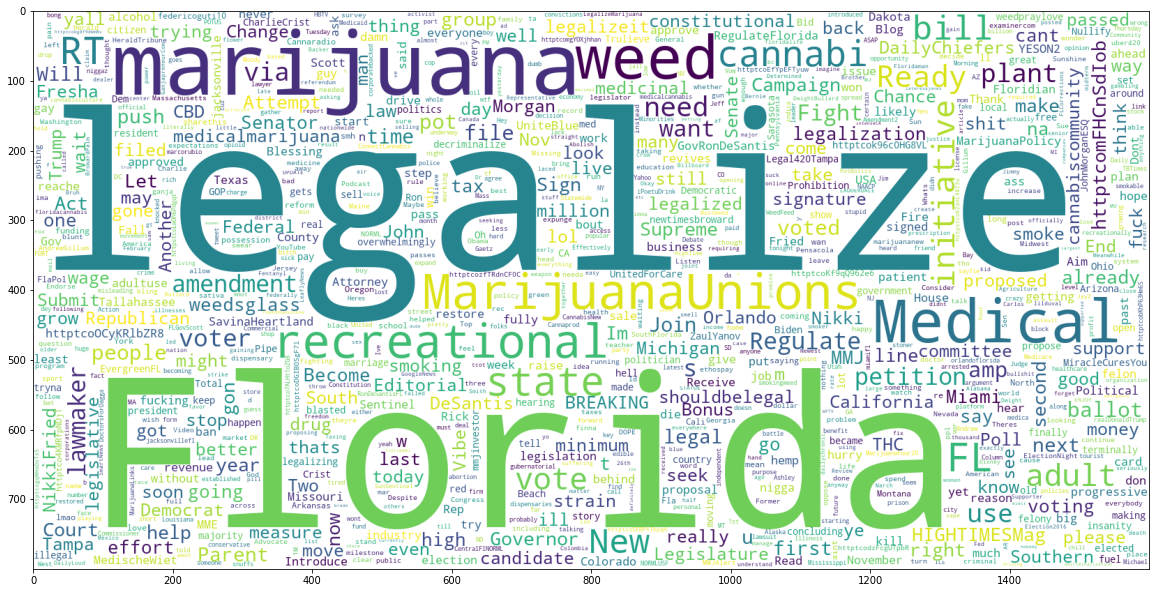

In [60]:
FL_df['processed_text_string'] = FL_df['processed_text'].apply(lambda x: ','.join(str(v) for v in x))
# WordCloud for all words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, background_color ='white',
               collocations=False).generate(" ".join(FL_df['processed_text_string']))
plt.imshow(wc)

In [61]:
OK_df['processed_text'] = OK_df['text'].apply(lambda x: cleaning_stopwords(x))

OK_df['processed_text']= OK_df['processed_text'].apply(lambda x: cleaning_punctuations(x))

#Tokenizing the tweets
OK_df['processed_text'] = OK_df['processed_text'].apply(word_tokenize)

OK_df['processed_text'] = OK_df['processed_text'].apply(lambda x: stemmer_on_text(x))

OK_df['processed_text'] = OK_df['processed_text'].apply(lambda x: lemmatizer_on_text(x))

OK_df.head()

username               location  \
0     PissPotPatty  North Tulsa, Oklahoma   
1     CCofOklahoma                    NaN   
2      RichardMize      Oklahoma City, OK   
3    Puff_Daddy_Jr       Calgary, Alberta   
4  AngelThornhill2             Lawton, OK   

                                                text  \
0  To all my Oklahoma followers, show up to the p...   
1  Oklahoma’s next big election will ask voters t...   
2  Oklahoma’s next big election will ask voters t...   
3  Oklahoma’s next big election will ask voters t...   
4  @DennisLBaker Legalize it and let our farmers ...   

                                      processed_text  
0  [To, Oklahoma, followers, show, polls, March, ...  
1  [Oklahoma, ’, s, next, big, election, ask, vot...  
2  [Oklahoma, ’, s, next, big, election, ask, vot...  
3  [Oklahoma, ’, s, next, big, election, ask, vot...  
4  [DennisLBaker, Legalize, let, farmers, grow, i...

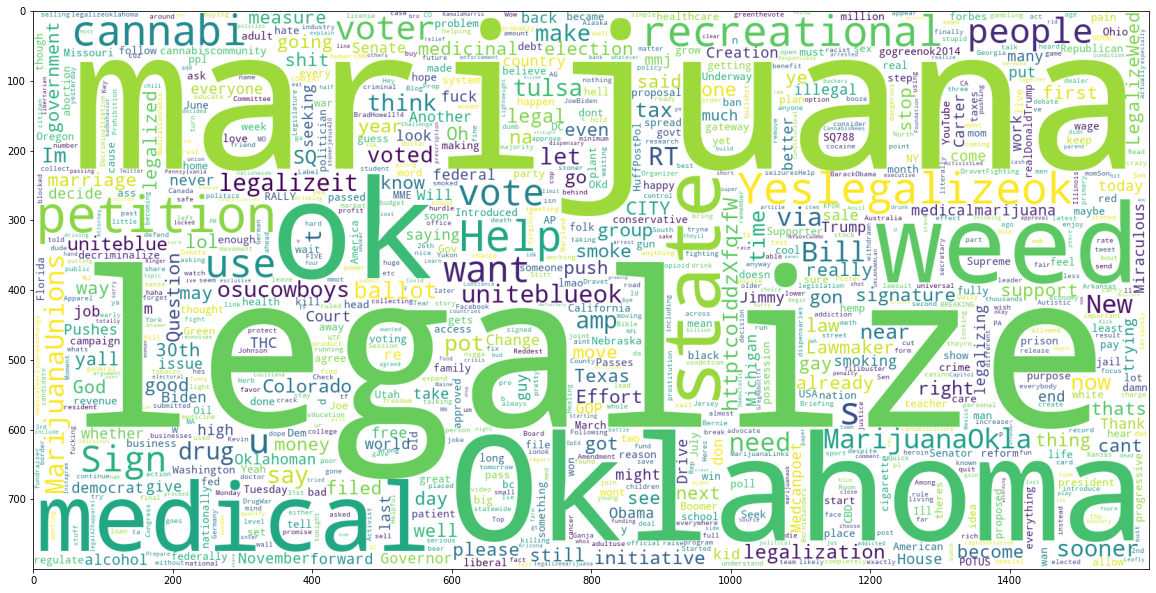

In [62]:
OK_df['processed_text_string'] = OK_df['processed_text'].apply(lambda x: ','.join(str(v) for v in x))
# WordCloud for all words
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, background_color ='white',
               collocations=False).generate(" ".join(OK_df['processed_text_string']))
plt.imshow(wc)

In [63]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
df = pd.read_csv('OHLegalize.csv', encoding='utf-8', index_col=0)
df['scores'] = df['text'].apply(lambda text: analyser.polarity_scores(str(text)))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
  #Function to categorize the compound value as positive, negative, or neutral
def senti(df):
  if df['compound'] >= 0.05:
      val = "Positive"
  elif df['compound'] <= -0.05:
      val = "Negative"
  else:
      val = "Neutral"
  return val

# Calling function  
df['Comp_score'] = df.apply(senti, axis=1)
df.head(5)

username                      location  \
0          13abc                  Toledo, Ohio   
1  Filtermag_org                  New York, NY   
2      8320Julie                           NaN   
3  OhioEricJones               Youngstown Ohio   
4  OhioGreenTeam  Throughout Ohio via Telemed!   

                                                text  \
0  If Ohio lawmakers don't take action to legaliz...   
1  "Of course, advocates would like to see Ohio t...   
2  @franklarose claims #Ohio constitution needs t...   
3      Do you think it's time to legalize marijuana?   
4  “The greatest virtue of man is perhaps curiosi...   

                                              scores  compound Comp_score  
0  {'neg': 0.107, 'neu': 0.845, 'pos': 0.048, 'co...   -0.4659   Negative  
1  {'neg': 0.051, 'neu': 0.781, 'pos': 0.169, 'co...    0.6310   Positive  
2  {'neg': 0.08, 'neu': 0.61, 'pos': 0.31, 'compo...    0.8809   Positive  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000    Neutral  
4  {'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...    0.7906   Positive

          Total  Percentage
Neutral    8432       41.22
Positive   6767       33.08
Negative   5258       25.70


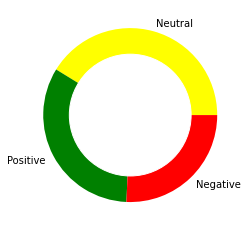

In [65]:
total=df.loc[:,'Comp_score'].value_counts(dropna=False)
percentage=round(df.loc[:,'Comp_score'].value_counts(dropna=False,normalize=True)*100,2)
summary = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
print(summary)
     

# create donut chart for the summary
names= summary.index
size=summary['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['yellow','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
     

In [66]:
df = pd.read_csv('PALegalize.csv', encoding='unicode_escape',lineterminator='\n', index_col=0)
df['scores'] = df['text'].apply(lambda text: analyser.polarity_scores(text))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
  #Function to categorize the compound value as positive, negative, or neutral
def senti(df):
  if df['compound'] >= 0.05:
      val = "Positive"
  elif df['compound'] <= -0.05:
      val = "Negative"
  else:
      val = "Neutral"
  return val

# Calling function  
df['Comp_score'] = df.apply(senti, axis=1)
df.head(5)

username          location  \
0    AllahHewitt  Philadelphia, PA   
1    mattkrotzer               NaN   
2  THEbrandonJ87                PA   
3  StanKachowski    Pittsburgh, PA   
4      sidejobs6               USA   

                                                text  \
0  @JohnFetterman Hello John, when will you legal...   
1  I always wonder why @PASenateGOP @SenatorAumen...   
2  The medical marijuana industry is thriving in ...   
3  @KDKA For years PA watched tax revenue flow to...   
4  @JohnFetterman @PaHouseDems @Joanna4PA Nice no...   

                                              scores  compound Comp_score  
0  {'neg': 0.0, 'neu': 0.709, 'pos': 0.291, 'comp...    0.8478   Positive  
1  {'neg': 0.037, 'neu': 0.743, 'pos': 0.219, 'co...    0.8100   Positive  
2  {'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...   -0.5719   Negative  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000    Neutral  
4  {'neg': 0.0, 'neu': 0.864, 'pos': 0.136, 'comp...    0.6705   Positive

          Total  Percentage
Neutral   10332       61.65
Positive   4521       26.97
Negative   1907       11.38


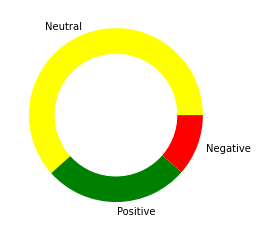

In [67]:
total=df.loc[:,'Comp_score'].value_counts(dropna=False)
percentage=round(df.loc[:,'Comp_score'].value_counts(dropna=False,normalize=True)*100,2)
summary = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
print(summary)
     

# create donut chart for the summary
names= summary.index
size=summary['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['yellow','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
     

In [68]:
df = pd.read_csv('FLLegalize.csv', encoding='utf-8', index_col=0)
df['scores'] = df['text'].apply(lambda text: analyser.polarity_scores(text))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
  #Function to categorize the compound value as positive, negative, or neutral
def senti(df):
  if df['compound'] >= 0.05:
      val = "Positive"
  elif df['compound'] <= -0.05:
      val = "Negative"
  else:
      val = "Neutral"
  return val

# Calling function  
df['Comp_score'] = df.apply(senti, axis=1)
df.head(5)

username                        location  \
0      Josie2192                Far Far Away, FL   
1  Tenenbaum1017  South Florida via Jersey Shore   
2    MixDoniagee                 VintageOlisa🪐⚡️   
3       loobca69                             NaN   
4     LookAtRojo           804 aka #KrownCity VA   

                                                text  \
0            Fully legalize it in Florida #marijuana   
1  So what do you do when your sitting in the mal...   
2  Nearly 50,000 valid petition signatures have b...   
3  People of Florida: Legalize Recreational Marij...   
4  I know Florida got medical marijuana... Did th...   

                                              scores  compound Comp_score  
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000    Neutral  
1  {'neg': 0.0, 'neu': 0.945, 'pos': 0.055, 'comp...    0.4215   Positive  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000    Neutral  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000    Neutral  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000    Neutral

          Total  Percentage
Neutral    7640       48.86
Positive   5146       32.91
Negative   2849       18.22


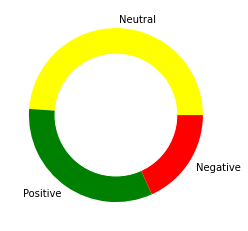

In [69]:
total=df.loc[:,'Comp_score'].value_counts(dropna=False)
percentage=round(df.loc[:,'Comp_score'].value_counts(dropna=False,normalize=True)*100,2)
summary = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
print(summary)
     

# create donut chart for the summary
names= summary.index
size=summary['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['yellow','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
     

In [70]:
df = pd.read_csv('OKLegalize.csv', encoding='utf-8', index_col=0)
df['scores'] = df['text'].apply(lambda text: analyser.polarity_scores(text))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
  #Function to categorize the compound value as positive, negative, or neutral
def senti(df):
  if df['compound'] >= 0.05:
      val = "Positive"
  elif df['compound'] <= -0.05:
      val = "Negative"
  else:
      val = "Neutral"
  return val

# Calling function  
df['Comp_score'] = df.apply(senti, axis=1)
df.head(5)

username               location  \
0     PissPotPatty  North Tulsa, Oklahoma   
1     CCofOklahoma                    NaN   
2      RichardMize      Oklahoma City, OK   
3    Puff_Daddy_Jr       Calgary, Alberta   
4  AngelThornhill2             Lawton, OK   

                                                text  \
0  To all my Oklahoma followers, show up to the p...   
1  Oklahoma’s next big election will ask voters t...   
2  Oklahoma’s next big election will ask voters t...   
3  Oklahoma’s next big election will ask voters t...   
4  @DennisLBaker Legalize it and let our farmers ...   

                                              scores  compound Comp_score  
0  {'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...    0.5754   Positive  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000    Neutral  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000    Neutral  
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000    Neutral  
4  {'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'comp...   -0.2960   Negative

          Total  Percentage
Positive   5689       49.51
Neutral    3899       33.93
Negative   1902       16.55


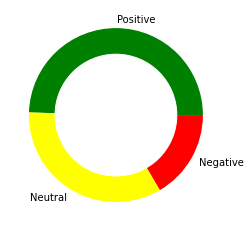

In [72]:
total=df.loc[:,'Comp_score'].value_counts(dropna=False)
percentage=round(df.loc[:,'Comp_score'].value_counts(dropna=False,normalize=True)*100,2)
summary = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
print(summary)
     

# create donut chart for the summary
names= summary.index
size=summary['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','yellow','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
     

          Total  Percentage
Positive   9965       40.18
Negative   7618       30.72
Neutral    7218       29.10


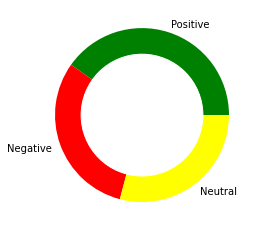

In [74]:
df = pd.read_csv('INLegalize.csv', encoding='utf-8', index_col=0)
df['scores'] = df['text'].apply(lambda text: analyser.polarity_scores(text))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
  #Function to categorize the compound value as positive, negative, or neutral
def senti(df):
  if df['compound'] >= 0.05:
      val = "Positive"
  elif df['compound'] <= -0.05:
      val = "Negative"
  else:
      val = "Neutral"
  return val

# Calling function  
df['Comp_score'] = df.apply(senti, axis=1)


total=df.loc[:,'Comp_score'].value_counts(dropna=False)
percentage=round(df.loc[:,'Comp_score'].value_counts(dropna=False,normalize=True)*100,2)
summary = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
print(summary)
     

# create donut chart for the summary
names= summary.index
size=summary['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','red','yellow'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

          Total  Percentage
Neutral    8636       41.43
Positive   7329       35.16
Negative   4880       23.41


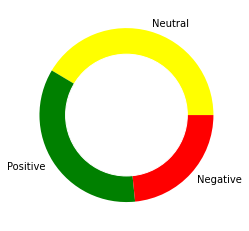

In [76]:
df = pd.read_csv('TXLegalize.csv', encoding='utf-8', index_col=0)
df['scores'] = df['text'].apply(lambda text: analyser.polarity_scores(text))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
  #Function to categorize the compound value as positive, negative, or neutral
def senti(df):
  if df['compound'] >= 0.05:
      val = "Positive"
  elif df['compound'] <= -0.05:
      val = "Negative"
  else:
      val = "Neutral"
  return val

# Calling function  
df['Comp_score'] = df.apply(senti, axis=1)


total=df.loc[:,'Comp_score'].value_counts(dropna=False)
percentage=round(df.loc[:,'Comp_score'].value_counts(dropna=False,normalize=True)*100,2)
summary = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
print(summary)
     

# create donut chart for the summary
names= summary.index
size=summary['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['yellow','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

          Total  Percentage
Neutral    4493       53.44
Positive   2268       26.97
Negative   1647       19.59


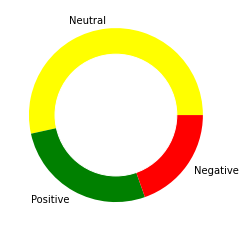

In [79]:
df = pd.read_csv('GALegalize.csv', lineterminator='\n', encoding='utf-8', index_col=0)
df['scores'] = df['text'].apply(lambda text: analyser.polarity_scores(text))
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
  #Function to categorize the compound value as positive, negative, or neutral
def senti(df):
  if df['compound'] >= 0.05:
      val = "Positive"
  elif df['compound'] <= -0.05:
      val = "Negative"
  else:
      val = "Neutral"
  return val

# Calling function  
df['Comp_score'] = df.apply(senti, axis=1)


total=df.loc[:,'Comp_score'].value_counts(dropna=False)
percentage=round(df.loc[:,'Comp_score'].value_counts(dropna=False,normalize=True)*100,2)
summary = pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
print(summary)
     

# create donut chart for the summary
names= summary.index
size=summary['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['yellow','green','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [91]:
#moving on with PA and OK. 
# Senate wise.
pa_sen_df = pd.read_csv("PASenTweets.csv", on_bad_lines='skip', encoding='utf-8', index_col=0)
ok_sen_df = pd.read_csv("OKSenTweets.csv", on_bad_lines='skip', encoding='utf-8', index_col=0)
pa_sen_list_df = pd.read_csv("pa_sen.csv", on_bad_lines='skip', encoding='utf-8', index_col=0)
ok_sen_list_df = pd.read_csv("Ok_Sen.csv", on_bad_lines='skip', encoding='utf-8', index_col=0)
pa_gov = "Josh Shapiro"
ok_gov = "Kevin Stitt"

ok_sen_list_df = ok_sen_list_df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7" ], axis = 1)


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Party
Senator                          
Micheal Bergstrom      Republican
Ally Seifried          Republican
Blake Cowboy Stephens  Republican
Tom Woods              Republican
George Burns           Republican

In [96]:
pa_sen_df['processed_text'] = pa_sen_df['text'].apply(lambda x: cleaning_stopwords(x))

pa_sen_df['processed_text']= pa_sen_df['processed_text'].apply(lambda x: cleaning_punctuations(x))

#Tokenizing the tweets
pa_sen_df['processed_text'] = pa_sen_df['processed_text'].apply(word_tokenize)

pa_sen_df['processed_text'] = pa_sen_df['processed_text'].apply(lambda x: stemmer_on_text(x))

pa_sen_df['processed_text'] = pa_sen_df['processed_text'].apply(lambda x: lemmatizer_on_text(x))

pa_sen_df.head(5)

username          location  \
0  NikilSaval  Philadelphia, PA   
1  NikilSaval  Philadelphia, PA   
2  NikilSaval  Philadelphia, PA   
3  NikilSaval  Philadelphia, PA   
4  NikilSaval  Philadelphia, PA   

                                                text  \
0  I’m so proud and excited to support my friend ...   
1  No film has all five:\n\n1. Chico\n2. Harpo\n3...   
2        @savthorpe @g_donnelly4 @Izzy4Lancaster 👑✊🏾   
3  @jblumgart How could someone so absurdly tall ...   
4                                 @BrendanMcP Oscars   

                                      processed_text  
0  [I, ’, m, proud, excited, support, friend, Ama...  
1  [No, film, five, 1, Chico, 2, Harpo, 3, Grouch...  
2       [savthorpe, gdonnelly4, Izzy4Lancaster, 👑✊🏾]  
3  [jblumgart, How, could, someone, absurdly, tal...  
4                               [BrendanMcP, Oscars]

In [97]:
!python -m spacy download en_core_web_lg

2022-12-05 00:40:09.336733: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 16 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [100]:
import spacy
import en_core_web_lg
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
nlp = spacy.load('en_core_web_lg')

# Spacy approach
attributes_nlp = nlp('legalize marijuana weed')
def get_spacy_similarity(review_words):
    text_review = ' '.join(review_words)
    review_nlp = nlp(text_review)
    return review_nlp.similarity(attributes_nlp)

pa_sen_df['spacy similarity'] =  pa_sen_df['processed_text'].apply(get_spacy_similarity)

<ipython-input-100-28f71862a968>:12: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return review_nlp.similarity(attributes_nlp)


In [101]:
from nltk.tokenize import sent_tokenize, word_tokenize
new_words = {
    'weed': 0.0,
    'marijuana': 0.0
}

analyser.lexicon.update(new_words)

In [102]:
pa_sen_df['sentiment_scores'] = pa_sen_df['processed_text'].apply(lambda text: analyser.polarity_scores(text))
pa_sen_df['compound']  = pa_sen_df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])

def senti(df):
    if df['compound'] >= 0.05:
        val = "Positive"
    elif df['compound'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

pa_sen_df['final_sentiment'] = pa_sen_df.apply(senti, axis=1)

In [103]:
pa_sen_df['eval_score'] = (pa_sen_df['spacy similarity']+(2*pa_sen_df['compound']))/2
pa_sen_df.sort_values(by='eval_score', ascending = False)
pa_sen_df.groupby('username')['spacy similarity', 'compound','eval_score'].mean().reset_index().sort_values(by='eval_score',ascending = False)

<ipython-input-103-1679c22b2622>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pa_sen_df.groupby('username')['spacy similarity', 'compound','eval_score'].mean().reset_index().sort_values(by='eval_score',ascending = False)


username  spacy similarity  compound  eval_score
2     JoshShapiroPA          0.333423  0.003848    0.170560
1        JayCostaPA          0.327770  0.002769    0.166654
43      StreetForPA          0.327958  0.001864    0.165843
5     PAAttorneyGen          0.327951  0.000184    0.164160
52  nickmillerforpa          0.326857  0.000000    0.163429
8    SenCappelletti          0.293977  0.015325    0.162314
48      amandaforpa          0.286063  0.017039    0.160070
0      Cris49048966          0.318864  0.000000    0.159432
40     SenatorSaval          0.316362  0.000668    0.158849
39      SenatorMuth          0.281771  0.016878    0.157763
34     SenatorJWard          0.309113  0.000000    0.154556
27   SenatorCollett          0.283754  0.011825    0.153702
55   senjimmydillon          0.305714  0.000000    0.152857
35  SenatorJohnKane          0.296928  0.004229    0.152693
28   SenatorComitta          0.286278  0.001388    0.144527
42     Senatorcosta          0.285173 -0.000210    0.142377
4        NikilSaval          0.280375  0.001065    0.141252
15    SenMartyFlynn          0.277603  0.001622    0.140424
38  SenatorMartinPA          0.272871  0.000000    0.136435
19  SenSharifStreet          0.268766  0.001545    0.135928
21    SenTimKearney          0.267882  0.000533    0.134474
36   SenatorKimWard          0.229857  0.019526    0.134454
17    SenRobinsonPA          0.263971  0.001842    0.133827
11   SenJudySchwank          0.255873  0.004097    0.132033
47   WayneForSenate          0.237573  0.012773    0.131559
49  brewster4senate          0.248800  0.006958    0.131357
30   SenatorGebhard          0.256541  0.001761    0.130032
16     SenMastriano          0.255520  0.000230    0.127990
14   SenLisaBoscola          0.253392  0.000984    0.127680
41   SenatorStefano          0.242607  0.005688    0.126992
32   SenatorHaywood          0.254700 -0.000701    0.126649
54    senbartolotta          0.244607  0.004082    0.126385
3         Martin4Pa          0.250960  0.000000    0.125480
23    SenWilliamsPA          0.243538  0.000029    0.121798
20   SenTartaglione          0.241843  0.000732    0.121654
10  SenHughesOffice          0.239144  0.000853    0.120425
24    SenatorArgall          0.235589  0.000000    0.117795
7     SJSantarsiero          0.234481  0.000000    0.117240
25    SenatorAument          0.233998 -0.000034    0.116965
37   SenatorKristin          0.231187  0.000885    0.116478
53  senatorlaughlin          0.234217 -0.000960    0.116149
6        RepBrownPA          0.229583  0.001224    0.116016
18   SenSantarsiero          0.227789  0.000678    0.114573
46    WayneDFontana          0.227400  0.000091    0.113791
29   SenatorDiSanto          0.221798  0.001147    0.112046
26  SenatorBrewster          0.215687  0.002840    0.110684
31   SenatorGeneYaw          0.215645  0.000097    0.107920
12    SenLangerholc          0.208355  0.000000    0.104177
13     SenLisaBaker          0.203097  0.002247    0.103795
22  SenTonyWilliams          0.194821  0.004692    0.102103
9   SenElderVogelJr          0.197102  0.000039    0.098589
44    TheMartyFlynn          0.176350  0.001790    0.089965
33    SenatorHughes          0.176114  0.000179    0.088236
45  VoteJohnDiSanto          0.169688  0.000853    0.085697
50   carolyncomitta          0.137763  0.000561    0.069443
51    dougmastriano          0.110851  0.013575    0.069001
56     wgregrothman          0.126484  0.000893    0.064135

In [104]:
PA_sen_analysis_data = pa_sen_df.groupby('username')['spacy similarity', 'compound','eval_score'].mean().reset_index().sort_values(by='eval_score',ascending = False)
PA_sen_analysis_data.reset_index(level=None, drop=True, inplace=True)
PA_sen_analysis_data

<ipython-input-104-7c8771e89d0b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  PA_sen_analysis_data = pa_sen_df.groupby('username')['spacy similarity', 'compound','eval_score'].mean().reset_index().sort_values(by='eval_score',ascending = False)


username  spacy similarity  compound  eval_score
0     JoshShapiroPA          0.333423  0.003848    0.170560
1        JayCostaPA          0.327770  0.002769    0.166654
2       StreetForPA          0.327958  0.001864    0.165843
3     PAAttorneyGen          0.327951  0.000184    0.164160
4   nickmillerforpa          0.326857  0.000000    0.163429
5    SenCappelletti          0.293977  0.015325    0.162314
6       amandaforpa          0.286063  0.017039    0.160070
7      Cris49048966          0.318864  0.000000    0.159432
8      SenatorSaval          0.316362  0.000668    0.158849
9       SenatorMuth          0.281771  0.016878    0.157763
10     SenatorJWard          0.309113  0.000000    0.154556
11   SenatorCollett          0.283754  0.011825    0.153702
12   senjimmydillon          0.305714  0.000000    0.152857
13  SenatorJohnKane          0.296928  0.004229    0.152693
14   SenatorComitta          0.286278  0.001388    0.144527
15     Senatorcosta          0.285173 -0.000210    0.142377
16       NikilSaval          0.280375  0.001065    0.141252
17    SenMartyFlynn          0.277603  0.001622    0.140424
18  SenatorMartinPA          0.272871  0.000000    0.136435
19  SenSharifStreet          0.268766  0.001545    0.135928
20    SenTimKearney          0.267882  0.000533    0.134474
21   SenatorKimWard          0.229857  0.019526    0.134454
22    SenRobinsonPA          0.263971  0.001842    0.133827
23   SenJudySchwank          0.255873  0.004097    0.132033
24   WayneForSenate          0.237573  0.012773    0.131559
25  brewster4senate          0.248800  0.006958    0.131357
26   SenatorGebhard          0.256541  0.001761    0.130032
27     SenMastriano          0.255520  0.000230    0.127990
28   SenLisaBoscola          0.253392  0.000984    0.127680
29   SenatorStefano          0.242607  0.005688    0.126992
30   SenatorHaywood          0.254700 -0.000701    0.126649
31    senbartolotta          0.244607  0.004082    0.126385
32        Martin4Pa          0.250960  0.000000    0.125480
33    SenWilliamsPA          0.243538  0.000029    0.121798
34   SenTartaglione          0.241843  0.000732    0.121654
35  SenHughesOffice          0.239144  0.000853    0.120425
36    SenatorArgall          0.235589  0.000000    0.117795
37    SJSantarsiero          0.234481  0.000000    0.117240
38    SenatorAument          0.233998 -0.000034    0.116965
39   SenatorKristin          0.231187  0.000885    0.116478
40  senatorlaughlin          0.234217 -0.000960    0.116149
41       RepBrownPA          0.229583  0.001224    0.116016
42   SenSantarsiero          0.227789  0.000678    0.114573
43    WayneDFontana          0.227400  0.000091    0.113791
44   SenatorDiSanto          0.221798  0.001147    0.112046
45  SenatorBrewster          0.215687  0.002840    0.110684
46   SenatorGeneYaw          0.215645  0.000097    0.107920
47    SenLangerholc          0.208355  0.000000    0.104177
48     SenLisaBaker          0.203097  0.002247    0.103795
49  SenTonyWilliams          0.194821  0.004692    0.102103
50  SenElderVogelJr          0.197102  0.000039    0.098589
51    TheMartyFlynn          0.176350  0.001790    0.089965
52    SenatorHughes          0.176114  0.000179    0.088236
53  VoteJohnDiSanto          0.169688  0.000853    0.085697
54   carolyncomitta          0.137763  0.000561    0.069443
55    dougmastriano          0.110851  0.013575    0.069001
56     wgregrothman          0.126484  0.000893    0.064135

In [105]:
PA_sen_analysis_data.to_csv("PA_sen_analysis_data.csv")